In [1]:
#Goal: Write code to solve linear-least squares of the from ax_i + b = y
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit

In [ ]:
#Choose some x_i
x_i = np.linspace(0,20,15)
x_i

# Noiseless data

(15,)

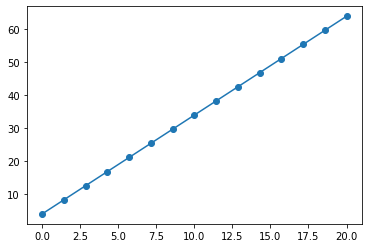

In [82]:
a=3
b=4
#Simulate random data
np.random.seed(333)
# y = data = np.random.random(size = 15).reshape(15,1)
data = a*x_i+b
data
plt.plot(x_i,y,'-o')
np.shape(data)

# Noisy data and plot

In [33]:
# now generate a sequence of random numbers, same length as your signal vector, drawn from a 0-centered Gaussian, with standard deviation "sigma" 
# which you can change to see the effect of additional noise
# add it to the signal to get a noisy version of the above graph!
# You will define signal-to-noise ratio as:  SNR = signal maximum/(std deviation of the noise vector)

In [29]:
G_matrix2 = np.vstack([x_i, np.ones(len(x_i))]).T
G_matrix2

array([[ 0.        ,  1.        ],
       [ 1.42857143,  1.        ],
       [ 2.85714286,  1.        ],
       [ 4.28571429,  1.        ],
       [ 5.71428571,  1.        ],
       [ 7.14285714,  1.        ],
       [ 8.57142857,  1.        ],
       [10.        ,  1.        ],
       [11.42857143,  1.        ],
       [12.85714286,  1.        ],
       [14.28571429,  1.        ],
       [15.71428571,  1.        ],
       [17.14285714,  1.        ],
       [18.57142857,  1.        ],
       [20.        ,  1.        ]])

In [34]:
pwd

'C:\\Users\\spencerri\\Dropbox\\Joshua Kim'

In [30]:
############
#1.Solve for "best" a_star,b_star in p_star such that the L2 norm is minimized 
############
p_star  = a_star, b_star = np.linalg.lstsq(G_matrix2, data, rcond=None)[0]
p_star

array([3., 4.])

In [35]:
############
#2. actual pseudoinverse closed-form solution
# this is good--but also try it with the by-hand matrix version
############
pinv = np.linalg.pinv(G_matrix2)
pinv

array([[-1.75000000e-02, -1.50000000e-02, -1.25000000e-02,
        -1.00000000e-02, -7.50000000e-03, -5.00000000e-03,
        -2.50000000e-03,  8.67361738e-19,  2.50000000e-03,
         5.00000000e-03,  7.50000000e-03,  1.00000000e-02,
         1.25000000e-02,  1.50000000e-02,  1.75000000e-02],
       [ 2.41666667e-01,  2.16666667e-01,  1.91666667e-01,
         1.66666667e-01,  1.41666667e-01,  1.16666667e-01,
         9.16666667e-02,  6.66666667e-02,  4.16666667e-02,
         1.66666667e-02, -8.33333333e-03, -3.33333333e-02,
        -5.83333333e-02, -8.33333333e-02, -1.08333333e-01]])

In [37]:
p_inv_star = a_inv_star,b_inv_star = np.matmul(pinv,data)
p_inv_star

array([3., 4.])

In [94]:
############
#3.Zero-Order Tikhonov Regularization
############
#Generate the nxn identity matrix. In this case, this is a 2x2 matrix
identity = np.identity(2)
identity
#Set some value lamb_da 
lamb_da = 0

In [95]:
#Generate G_tilde
G_tilde = np.concatenate((G_matrix2,lamb_da*identity))
G_tilde

array([[ 0.        ,  1.        ],
       [ 1.42857143,  1.        ],
       [ 2.85714286,  1.        ],
       [ 4.28571429,  1.        ],
       [ 5.71428571,  1.        ],
       [ 7.14285714,  1.        ],
       [ 8.57142857,  1.        ],
       [10.        ,  1.        ],
       [11.42857143,  1.        ],
       [12.85714286,  1.        ],
       [14.28571429,  1.        ],
       [15.71428571,  1.        ],
       [17.14285714,  1.        ],
       [18.57142857,  1.        ],
       [20.        ,  1.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ]])

In [96]:
np.vstack(np.zeros(2)), np.shape(data), np.shape(np.vstack(np.zeros(2))[:,0])

(array([[0.],
        [0.]]),
 (15,),
 (2,))

In [97]:
#Generate data_tilde
data_tilde = np.concatenate((data, np.vstack(np.zeros(2))[:,0]))
data_tilde

array([ 4.        ,  8.28571429, 12.57142857, 16.85714286, 21.14285714,
       25.42857143, 29.71428571, 34.        , 38.28571429, 42.57142857,
       46.85714286, 51.14285714, 55.42857143, 59.71428571, 64.        ,
        0.        ,  0.        ])

In [98]:
len(data), len(data_tilde)

(15, 17)

In [99]:
#apply pseudoinverse solution
pinv_tilde = np.linalg.pinv(G_tilde)
pinv_tilde

array([[-1.75000000e-02, -1.50000000e-02, -1.25000000e-02,
        -1.00000000e-02, -7.50000000e-03, -5.00000000e-03,
        -2.50000000e-03,  8.67361738e-19,  2.50000000e-03,
         5.00000000e-03,  7.50000000e-03,  1.00000000e-02,
         1.25000000e-02,  1.50000000e-02,  1.75000000e-02,
         0.00000000e+00,  0.00000000e+00],
       [ 2.41666667e-01,  2.16666667e-01,  1.91666667e-01,
         1.66666667e-01,  1.41666667e-01,  1.16666667e-01,
         9.16666667e-02,  6.66666667e-02,  4.16666667e-02,
         1.66666667e-02, -8.33333333e-03, -3.33333333e-02,
        -5.83333333e-02, -8.33333333e-02, -1.08333333e-01,
         0.00000000e+00,  0.00000000e+00]])

In [101]:
#Find the best solution for lambda = 1
p_inv_t_star = a_inv_t_star,b_inv_t_star = np.matmul(pinv_tilde,data_tilde)
p_inv_t_star

array([3., 4.])

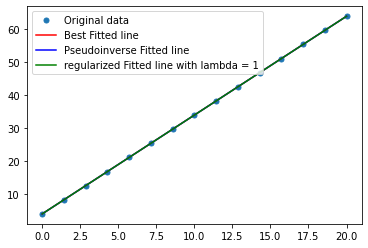

In [102]:
#Plot it
#Plot the original data
plot = plt.plot(x_i, y, 'o', label='Original data', markersize=5)
#Plot some line from some random choice of a and b
#plot =  plt.plot(x_i, a*x_i + b, 'b', label='Fitted line from original a and b')
#Plot some line from the "best" choice of a and b
plot = plt.plot(x_i, a_star*x_i + b_star, 'r', label='Best Fitted line')
plot = plt.plot(x_i, a_inv_star*x_i + b_inv_star, 'b', label='Pseudoinverse Fitted line')
plot = plt.plot(x_i, a_inv_t_star*x_i + b_inv_t_star, 'g', label='regularized Fitted line with lambda = 1')
plot = plt.legend()
plt.show()


In [103]:
bestfit = stats.linregress(x_i, (a_star*x_i + b_star))
print(f"R-squared bestfit: {bestfit.rvalue**2:f}")
pseudo = stats.linregress(x_i, (a_inv_star*x_i + b_inv_star))
print(f"R-squared pseudo: {pseudo.rvalue**2:f}")
tikanov = stats.linregress(x_i, (a_inv_t_star*x_i + b_inv_t_star))
print(f"R-squared tikhanov: {tikanov.rvalue**2:f}")

R-squared bestfit: 1.000000
R-squared pseudo: 1.000000
R-squared tikhanov: 1.000000


In [104]:
######
#4.Find the best lambda value on some biexponential decay curve
######

In [ ]:
#Generate data
t = np.linspace(0,4,50)

In [ ]:
#First generate some biexponential decay curve with 3 parameters
def curve(t,a,b):
    return a*np.exp(-t/2) + b*np.exp(-t/3)


In [ ]:
plt.plot(t,curve(t,a=0.7,b=0.3))

In [18]:
#Example of exponential data
y = curve(t,0.3,0.4)
#
popt, pcov = curve_fit(curve,t,y,p0=(1.0,1.0))
p1 = popt[0] # a value
p2 = popt[1] # b value

In [19]:
curvey = curve(t,p1,p2) # This is your y axis fit-line

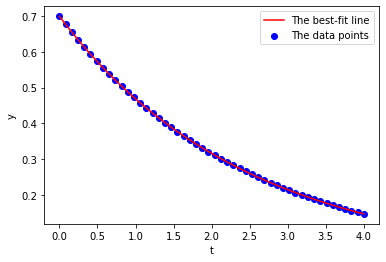

In [20]:
plt.plot(t, curvey, 'red', label='The best-fit line')
plt.scatter(t,y, c='b',label='The data points')
plt.legend(loc='best')
plt.xlabel('t')
plt.ylabel('y')
plt.show()

In [21]:
#Obtain the P* estimates for a decay curve for a given lambda
#Simulate across multiple lambdas

In [22]:
#Create a histogram of oracle lambdas across noise realizations